In [32]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
f = open('data', 'r')
txt = f.read()
txt = txt.replace('<not counted>', '0')
f.close()
f2 = open('data2', 'w')
f2.write(txt)
d = pd.read_csv('data2',skiprows=2, sep='\s+', header=0, names=['Time', 'Num', 'type'], index_col=False)
d = d[d['Time'] != '#']
d['Time'] = d['Time'].astype('float')
d.info()
# os.system('cat hi')
a={}
n={'l2_cache_misses_from_dc_misses':'l2m1', 'l2_cache_misses_from_ic_miss':'l2m2', 'ex_ret_instr':'ins', 'l2_request_g1.all_no_prefetch':'l2a'}

<class 'pandas.core.frame.DataFrame'>
Index: 380 entries, 0 to 382
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    380 non-null    float64
 1   Num     380 non-null    object 
 2   type    380 non-null    object 
dtypes: float64(1), object(2)
memory usage: 11.9+ KB


/tmp/ipykernel_655848/1049218617.py:12: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  d = pd.read_csv('data2',skiprows=2, sep='\s+', header=0, names=['Time', 'Num', 'type'], index_col=False)


In [33]:
# d['Num'] = d['Num'].astype('str')
# d.replace('<not counted>', '0')
d['Num'] = d['Num'].apply(lambda x: int(x.replace(',', '')))
# d.loc[9340:9360]

In [34]:
for m, v in n.items():
    a[v] = d[d['type']==m].reset_index(drop=True)


In [35]:
# for k, v in a.items():
#     print(v)
# d.loc[4]['Num']

In [36]:
a['l2m'] = a['l2m1'].copy()
a['l2m']['Num'] = a['l2m']['Num'].add(a['l2m2']['Num'])
for k, v in a.items():
    a[k]= v.drop(columns='type')
    

In [37]:
acc = a['l2a']
print(len(acc))
acc.head()


95


,Time,Num
0,0.250279,52652042
1,0.500735,55283152
2,0.751058,34197007
3,1.001346,51613006
4,1.251693,63679940


In [38]:
miss = a['l2m']
print(len(miss))
miss.head()

95


,Time,Num
0,0.250279,15974146
1,0.500735,16722297
2,0.751058,8894389
3,1.001346,5927900
4,1.251693,20482456


In [39]:
ins = a['ins']
print(len(ins))
ins.head()

95


,Time,Num
0,0.250279,676119553
1,0.500735,1032635648
2,0.751058,1148121646
3,1.001346,1072395109
4,1.251693,669754927


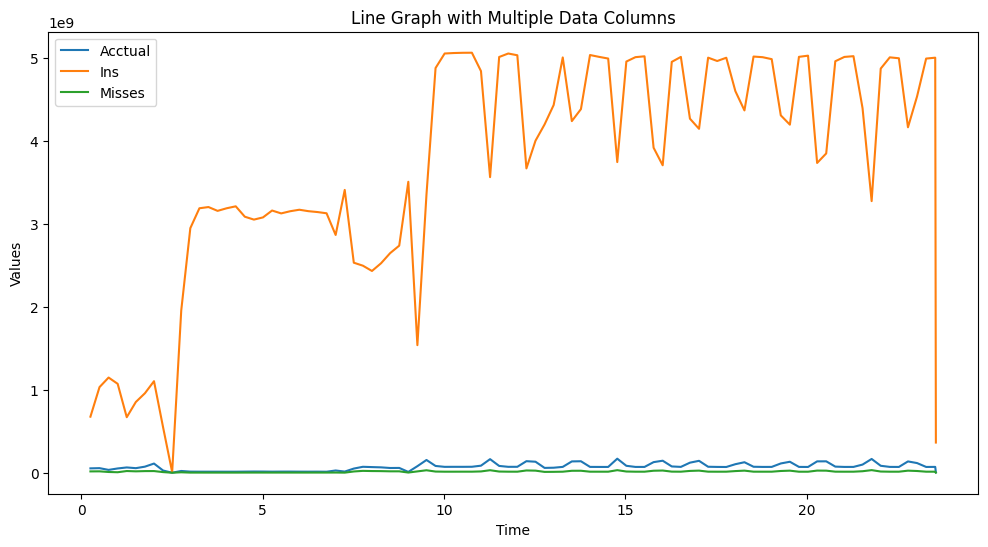

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.figure(figsize=(12, 6))  # Adjust the figure size if needed

# Plot the "acc" data
plt.plot(acc['Time'], acc['Num'], label='Acctual')

# Plot the "ins" data
plt.plot(ins['Time'], ins['Num'], label='Ins')

# Plot the "miss" data
plt.plot(miss['Time'], miss['Num'], label='Misses')

# Add labels and a legend
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Line Graph with Multiple Data Columns')
plt.legend()

# Show the plot
plt.show()

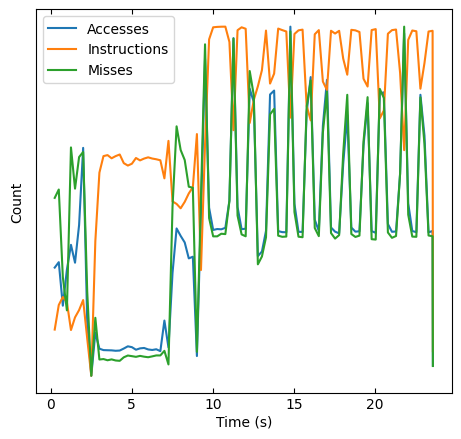

In [41]:
import matplotlib.pyplot as plt

from mpl_toolkits.axisartist.parasite_axes import HostAxes

fig = plt.figure()




host = fig.add_axes([0.15, 0.1, 0.65, 0.8], axes_class=HostAxes)
par1 = host.get_aux_axes(viewlim_mode=None, sharex=host)
par2 = host.get_aux_axes(viewlim_mode=None, sharex=host)

# host.axis["right"].set_visible(False)

# par1.axis["right"].set_visible(True)
# par1.axis["right"].major_ticklabels.set_visible(True)
# par1.axis["right"].label.set_visible(True)

# par2.axis["right2"] = par2.new_fixed_axis(loc="right", offset=(60, 0))



p1, = host.plot(acc['Time'], acc['Num'], label="Accesses")
p2, = par1.plot(ins['Time'], ins['Num'], label="Instructions")
p3, = par2.plot(miss['Time'], miss['Num'], label="Misses")

plt.yticks([]) 
# host.set( xlabel="Time", ylabel="Density")
# par1.set(ylabel="Temperature")
# par2.set( ylabel="Velocity")

host.legend()
plt.ylabel('Count', fontsize=15)
plt.xlabel('Time (s)', fontsize=15)

# host.axis["left"].label.set_color(p1.get_color())
# par1.axis["right"].label.set_color(p2.get_color())
# par2.axis["right2"].label.set_color(p3.get_color())



plt.show()